# Notebook notes

This notebook is for testing and training of CNN-based DQN

Each member of "options" list is a State99 

what happens after call step?

1. state of the player controlled by Agent is updated. It becomes exactly as one passed in "aciton" dictionary
2. states of all other players are updated
3. after all of the updates happened, *.step() calculates all options for the NEXT step (for pieces it holds at hand and in swap). These options, along with rewards they will trigger, are returned.

# Import libs

**setup autoreload**

In [1]:
%load_ext autoreload
%autoreload 2

**configure system path**

In [2]:
import os
import sys

# list directories where packages are stored
# note that the parent directory of te repo is added automatically
GYM_FOLDER = "gym-t99"

# get this notebook's current working directory
nb_cwd = os.getcwd()
# get name of its parent directory
nb_parent = os.path.dirname(nb_cwd)
# add packages to path
sys.path.insert(len(sys.path), nb_parent)
sys.path.insert(len(sys.path), os.path.join(nb_parent, GYM_FOLDER))

**import custom packages**

Use this code if you have not yet loaded gym_t99

In [3]:
import gym
registered = gym.envs.registration.registry.env_specs.copy()

import gym_t99
import t_net

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


**import custom packages**

Use this code if you have already loaded gym_t99, but now you introduced changes and want to re-load it again

In [15]:
import imp

# this code removes environment from gym's registry
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if env not in registered:
        print("Remove {} from registry".format(env))
        del gym.envs.registration.registry.env_specs[env]

imp.reload(gym_t99)

Remove basic-v0 from registry
Remove t99-v0 from registry
Remove t99sc-v0 from registry


<module 'gym_t99' from 'C:\\Users\\slavc\\Desktop\\UCLA\\Courses\\Spring_2021\\239AS\\239AS_T99_RL_Agent\\gym-t99\\gym_t99\\__init__.py'>

In [16]:
imp.reload(t_net)

<module 't_net' from 'C:\\Users\\slavc\\Desktop\\UCLA\\Courses\\Spring_2021\\239AS\\239AS_T99_RL_Agent\\t_net\\__init__.py'>

**import out-of-the-box packages**

In [4]:
# import matplotlib
import matplotlib.pyplot as plt
# configure matplotlib
%matplotlib inline

import numpy as np
from copy import deepcopy

# import torch
import torch
from torch import nn

# configure torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Testground

In [5]:
custom_gym = gym.make('gym_t99:t99sc-v0', num_players = 1, enemy=None)

In [81]:
custom_gym.reset()

In [80]:
frame = custom_gym.render(mode="debug")
# frame[0][-4, 2:6] = 1
print(frame[0])

[[10 10 10  0  0  0  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  6  0  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  6  6  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  6  0  0  0  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  3  3  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  1  1  1  1 10 10 10]
 [10 10 10  0  0  0  0  0  0  4  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  4  4  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  4  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  6  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  3  3  6  6  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  3  0  6  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  3  0  5  5  0 10 10 10]
 [10 10 10  0  0  0  0  1  1  1  1  5  5 10 10 10]
 [10 10 10  0  0  0  0  0  1  1  1  1  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  0  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  3  3  0  0 10 10 10]
 [10 10 10  0  0  0  0  0  0  6

In [83]:
options, rewards = custom_gym._observe(0)

In [84]:
action = {
    "reward": rewards[np.random.randint(0, high=len(rewards))],
    "state": options[np.random.randint(0, high=len(rewards))]
}

observation, _, done, _ = custom_gym.step(action)
options, rewards = observation

In [22]:
custom_gym.state.players[0].incoming_garbage = [1, 1, 2, 2, 2, 3]

In [49]:
custom_gym.state.players[0].attack_strategy = 4

# NN training

In [8]:
# initialize net
my_net = t_net.FCNet()
# initialize features
my_features = t_net.calculate_linear_features

In [9]:
agent = t_net.AgentSC(env=custom_gym,
                      discount = 0.99,
                      net = my_net,
                      learning_rate = 0.001,
                      criterion = nn.MSELoss(),
                      device=device,
                      features = my_features)

In [11]:
r_hist = []
step_hist = []

In [15]:
new_r, new_step = agent.train(steps=100000)
r_hist.extend(new_r)
step_hist.extend(new_step)

calculating step 0
policy net updated
calculating step 1000
calculating step 2000
policy net updated
calculating step 3000
calculating step 4000
policy net updated
calculating step 5000
calculating step 6000
policy net updated
calculating step 7000
calculating step 8000
policy net updated
calculating step 9000
calculating step 10000
policy net updated
calculating step 11000
calculating step 12000
policy net updated
calculating step 13000
calculating step 14000
policy net updated
calculating step 15000
calculating step 16000
policy net updated
calculating step 17000
calculating step 18000
policy net updated
calculating step 19000
calculating step 20000
policy net updated
calculating step 21000
calculating step 22000
policy net updated
calculating step 23000
calculating step 24000
policy net updated
calculating step 25000
calculating step 26000
policy net updated
calculating step 27000
calculating step 28000
policy net updated
calculating step 29000
calculating step 30000
policy net upda

In [17]:
print(len(agent.memory))
agent.replay_start_size = 500

477


Text(0, 0.5, 'Number of steps')

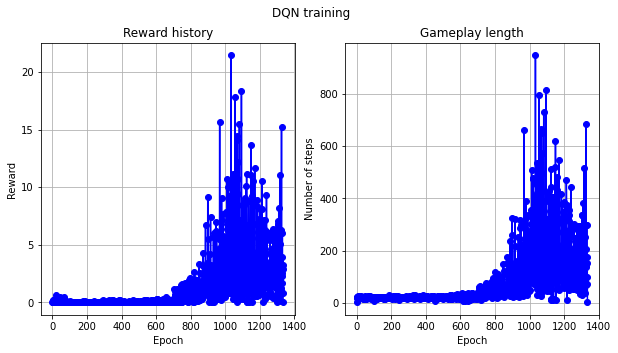

In [16]:
epochs = np.arange(len(r_hist))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

fig.suptitle("DQN training")
ax1.plot(epochs, r_hist, "-ob")
ax1.grid()
ax1.title.set_text("Reward history")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Reward')
ax2.plot(epochs, step_hist, "-ob")
ax2.grid()
ax2.title.set_text("Gameplay length")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Number of steps')
# plt.savefig("/content/drive/Shareddrives/ECE236A Project2/Final_Plots/ experiment with alpha.png", dpi=200)

In [10]:
agent.target_net(torch.Tensor([0, 1, 2, 3]))

tensor([-0.3360], grad_fn=<AddBackward0>)

In [ ]:
torch.save(agent.target_model.state_dict(), 'model_weights.pth')